<a href="https://colab.research.google.com/github/itsDV7/DataScience_with_Python/blob/main/SVM_Assignment14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Social_Network_Ads.csv

**Import libraries**

In [30]:
pip install mlxtend==0.18.0

     |████████████████████████████████| 1.3 MB 8.0 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

**Importing the dataset**

In [3]:
data = pd.read_csv("Social_Network_Ads.csv")
df = data.copy()

**EDA**

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df = df.drop('User ID', axis=1)

In [6]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


**Encoding**

In [7]:
LE = LabelEncoder()

In [8]:
df['Gender'] = LE.fit_transform(df.Gender)

In [9]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [10]:
X = df.iloc[:,:-1]
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [11]:
y = df.iloc[:, -1]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)
print(f'X Train:\n{X_train}\n')
print(f'X Test:\n{X_test}\n')
print(f'Y Train:\n{y_train}\n')
print(f'Y Test:\n{y_test}\n')

X Train:
     Gender  Age  EstimatedSalary
93        0   29            28000
23        0   45            22000
299       1   46           117000
13        1   32            18000
90        1   22            81000
..      ...  ...              ...
255       0   52            90000
72        0   20            23000
396       1   51            23000
235       1   46            79000
37        1   30            49000

[320 rows x 3 columns]

X Test:
     Gender  Age  EstimatedSalary
398       1   36            33000
125       0   39            61000
328       1   36           118000
339       1   39           122000
172       0   26           118000
..      ...  ...              ...
347       0   54           108000
41        0   33            51000
180       1   26            16000
132       1   30            87000
224       0   35            60000

[80 rows x 3 columns]

Y Train:
93     0
23     1
299    1
13     0
90     0
      ..
255    1
72     0
396    1
235    1
37     0
Name: Purc

**Feature Scaling**

In [13]:
X = df.iloc[:,:-1]
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [14]:
y = df.iloc[:, -1]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)
print(f'X Train:\n{X_train}\n')
print(f'X Test:\n{X_test}\n')
print(f'Y Train:\n{y_train}\n')
print(f'Y Test:\n{y_test}\n')

X Train:
     Gender  Age  EstimatedSalary
93        0   29            28000
23        0   45            22000
299       1   46           117000
13        1   32            18000
90        1   22            81000
..      ...  ...              ...
255       0   52            90000
72        0   20            23000
396       1   51            23000
235       1   46            79000
37        1   30            49000

[320 rows x 3 columns]

X Test:
     Gender  Age  EstimatedSalary
398       1   36            33000
125       0   39            61000
328       1   36           118000
339       1   39           122000
172       0   26           118000
..      ...  ...              ...
347       0   54           108000
41        0   33            51000
180       1   26            16000
132       1   30            87000
224       0   35            60000

[80 rows x 3 columns]

Y Train:
93     0
23     1
299    1
13     0
90     0
      ..
255    1
72     0
396    1
235    1
37     0
Name: Purc

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [18]:
X_train = scaler.transform(X_train)
X_train

array([[0.        , 0.26190476, 0.0962963 ],
       [0.        , 0.64285714, 0.05185185],
       [1.        , 0.66666667, 0.75555556],
       [1.        , 0.33333333, 0.02222222],
       [1.        , 0.0952381 , 0.48888889],
       [1.        , 0.16666667, 0.53333333],
       [1.        , 0.71428571, 0.13333333],
       [1.        , 0.4047619 , 0.31851852],
       [1.        , 0.69047619, 0.05925926],
       [1.        , 0.19047619, 0.12592593],
       [0.        , 0.33333333, 0.88888889],
       [1.        , 1.        , 0.14074074],
       [0.        , 0.80952381, 0.04444444],
       [0.        , 0.47619048, 0.2962963 ],
       [1.        , 0.16666667, 0.55555556],
       [0.        , 0.95238095, 0.17037037],
       [1.        , 0.73809524, 0.54074074],
       [0.        , 0.45238095, 0.46666667],
       [0.        , 0.4047619 , 0.45925926],
       [0.        , 0.38095238, 0.20740741],
       [1.        , 0.04761905, 0.25185185],
       [1.        , 0.66666667, 0.54074074],
       [0.

In [19]:
X_test = scaler.transform(X_test)
X_test

array([[1.        , 0.42857143, 0.13333333],
       [0.        , 0.5       , 0.34074074],
       [1.        , 0.42857143, 0.76296296],
       [1.        , 0.5       , 0.79259259],
       [0.        , 0.19047619, 0.76296296],
       [0.        , 0.47619048, 0.37037037],
       [0.        , 0.04761905, 0.15555556],
       [1.        , 0.73809524, 0.54814815],
       [1.        , 0.30952381, 0.02222222],
       [1.        , 0.71428571, 0.93333333],
       [0.        , 0.38095238, 0.42222222],
       [0.        , 0.5       , 0.42962963],
       [1.        , 0.4047619 , 0.42222222],
       [0.        , 0.71428571, 0.85925926],
       [0.        , 0.83333333, 0.4962963 ],
       [1.        , 0.9047619 , 0.87407407],
       [1.        , 1.        , 0.5037037 ],
       [1.        , 0.21428571, 0.31851852],
       [0.        , 0.23809524, 0.53333333],
       [1.        , 1.        , 0.64444444],
       [0.        , 0.52380952, 0.44444444],
       [0.        , 0.76190476, 0.54074074],
       [0.

**Fitting SVM to the Training set**

In [80]:
classifier = SVC(kernel='poly')

In [81]:
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [82]:
classifier.score(X_train, y_train)*100

91.875

**Predicting the Test set results**

In [83]:
predictions = classifier.predict(X_test)
predictions

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [84]:
classifier.score(X_test, y_test)*100

87.5

**Making the Confusion Matrix**

In [85]:
cm = confusion_matrix(y_test, predictions)
cm

array([[40,  8],
       [ 2, 30]])

**Visualising the Training set results**

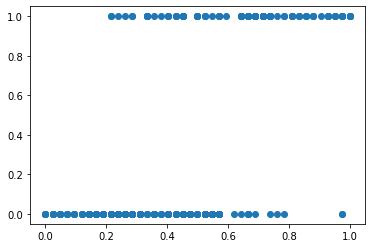

In [86]:
plt.scatter(X_train[:,1], y_train)

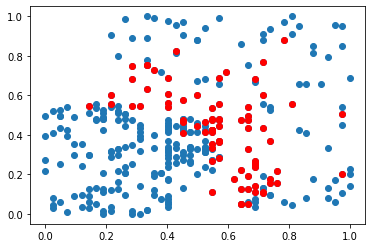

In [87]:
plt.scatter(X_train[:,1], X_train[:,2])
plt.scatter(classifier.support_vectors_[:,1], classifier.support_vectors_[:,2], color='red')

**Visualising the Test set results**

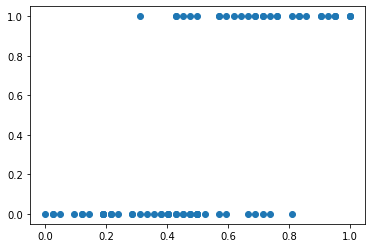

In [56]:
plt.scatter(X_test[:,1], y_test)

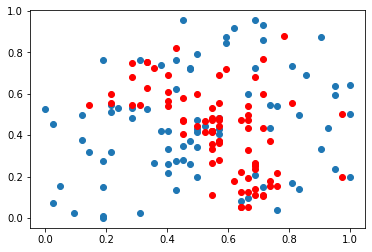

In [89]:
plt.scatter(X_test[:,1], X_test[:,2])
plt.scatter(classifier.support_vectors_[:,1], classifier.support_vectors_[:,2], color='red')